## Programming Exercise 4

### Setup
This loads the required modules. No other modules are necessary to successfully finish this exercise.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from scipy import signal

### 4.1 Image Filtering in the Frequency Domain

#### 4.1.1

Load the image *london.jpg* from the *resources* folder, convert it to floating point format and transform the color space to grayscale. Display the final image.

(3264, 4896)


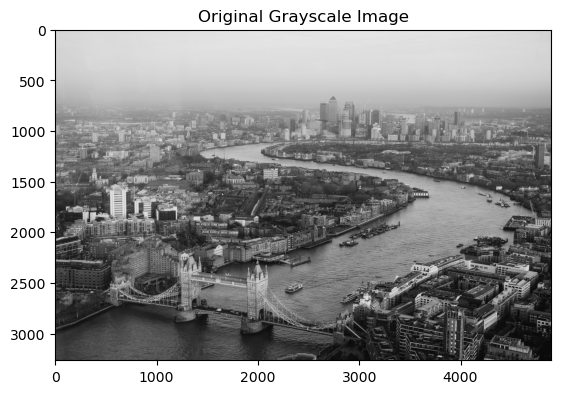

In [3]:
img=img_as_float(io.imread("./resources/london.jpg"))
img_gray=color.rgb2gray(img)
plt.imshow(img_gray,cmap='gray')
plt.title("Original Grayscale Image")
print(img_gray.shape)
plt.show()

#### 4.1.2

Create a function that returns a gaussian kernel with variable width and standard deviation as: `gaussian_kernel(width, sigma)`.
The Gaussian kernel is defined as

$$G[m, n] = \frac{1}{C} \cdot e^{-\frac{m^2 + n^2}{2\sigma^2}} \text{ with } C = \sum_{m, n} e^{-\frac{m^2 + n^2}{2\sigma^2}},$$

where $C$ normalizes the filter kernel to prevent intensity scaling.

Using this function, generate a large Gaussian kernel with `width=201` and `sigma=10`. Plot the kernel.

In [4]:
def gaussian_kernel(width,sigma):
    C=0
    for i in range(width):
        for j in range(width):
            C+=np.exp(-(i**2+j**2/2*sigma**2))
    G=np.zeros(shape=(width,width))
    for i in range(width):
        for j in range(width):
            G[i,j]=(1/C)*np.exp(-(i**2+j**2/2*sigma**2))
    return G
G=gaussian_kernel(201,10)
print(G.shape)

(201, 201)


#### 4.1.3

Filter the image with the generated Gaussian kernel from subtask 3.1.2 in the frequency domain. To achieve this, pad the kernel to match the image size, first. Then, transform both the image and the padded kernel to the frequency domain and filter the image. Display the filtered image in the spatial domain. Don't worry if the result is not perfect. This is expected and will be solved in the following subtasks.

*Hint: The functions `np.pad` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.pad.html)), `np.fft.fft2` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html)) and `np.fft.ifft2` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html)) could be useful.*

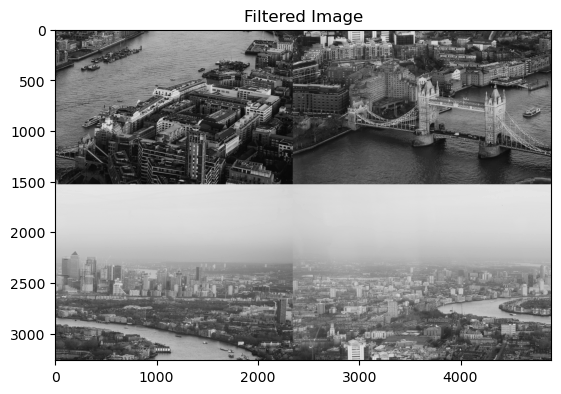

In [5]:
pad_height=(img_gray.shape[0]-G.shape[0])//2
pad_width=(img_gray.shape[1]-G.shape[1])//2
padded_G=np.pad(G,((pad_height,pad_height+1),(pad_width,pad_width+1)),mode='constant',constant_values=0)
img_gray_F=np.fft.fft2(img_gray)
padded_G_F=np.fft.fft2(padded_G)
filtered_image_F=img_gray_F*padded_G_F
filtered_image=np.fft.ifft2(filtered_image_F)
plt.imshow(np.real(filtered_image),cmap='gray')
plt.title("Filtered Image")
plt.show()

#### 4.1.4

The filtering operation from subtask 3.1.3 introduces an undesired shift into the filtered image. The cause of this is that the Gaussian kernel is defined to have its center in the middle rendering it non-causal in the spatial domain. This is not taken into account in subtask 3.1.3. As the DFT is built upon the assumption of periodic signals, the padded filter kernel can be wrapped around to respect the non-causal part of the filter. In the end, the center of the filter needs to be at position `(0, 0)`. Filter the image with the correctly padded filter kernel in the frequency domain and display the final result.

*Hint: `np.roll` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.roll.html)) could be useful.*

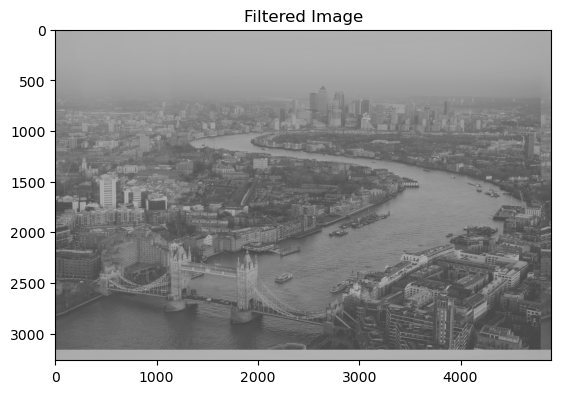

In [6]:
padded_G_F=np.fft.fftshift(np.fft.fft2(padded_G))
filtered_image_F=img_gray_F*padded_G_F
filtered_image=np.fft.ifftshift(np.fft.ifft2(filtered_image_F))
plt.imshow(np.real(filtered_image),cmap='gray')
plt.title("Filtered Image")
plt.show()

#### 4.1.5

While the undesired shift in the filtered image is eliminated, artifacts are still visible at the borders. These artifacts are caused by the implicit circular convolution in the frequency domain. To prevent this, pad the image with `width - 1` zeros before filtering. Display the final image (do not forget to remove the padding).

*Hint: `np.pad` provides different padding modes. Find a mode that performs better than the default `"constant"` mode.*

(3664, 5296)
(201, 201)


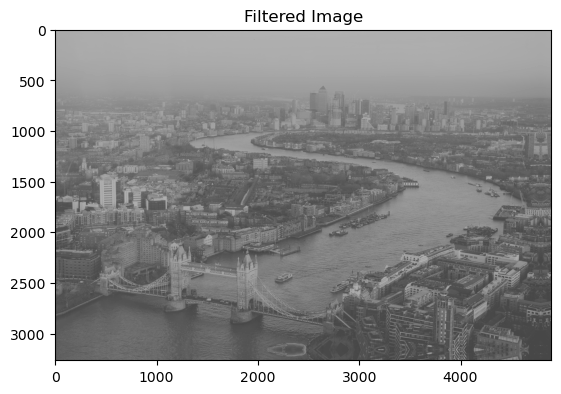

In [7]:
padded_img=np.pad(img_gray,((G.shape[1]-1,G.shape[1]-1),(G.shape[1]-1,G.shape[1]-1)),mode='reflect')
print(padded_img.shape)
print(G.shape)
pad_height=(padded_img.shape[0]-G.shape[0])//2
pad_width=(padded_img.shape[1]-G.shape[1])//2
padded_G=np.pad(G,((pad_height,pad_height+1),(pad_width,pad_width+1)),mode='constant',constant_values=0)
img_gray_F=np.fft.fft2(padded_img)
padded_G_F=np.fft.fftshift(np.fft.fft2(padded_G))
filtered_image_F=img_gray_F*padded_G_F
filtered_image=np.fft.ifftshift(np.fft.ifft2(filtered_image_F))
filtered_image=filtered_image[G.shape[1]-1:-(G.shape[1]-1),G.shape[1]-1:-(G.shape[1]-1)]
plt.imshow(np.real(filtered_image),cmap='gray')
plt.title("Filtered Image")
plt.show()